In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
pd.set_option('display.max_rows', 10)

In [2]:
data_file = 'C:/Users/chake/Desktop/log.txt'

In [3]:
# Load in the data set as required
data = pd.read_csv(data_file, delim_whitespace=True)
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data['datetime'] = pd.to_datetime(data['date'] + " " + data['time'])
data


,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2022-01-01,04:31:00,198.133.173.60,GET,tvltckxq.css,-,443,-,158.176.232.200,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_7+like+M...,-,404,0,0,20,2022-01-01 04:31:00
1,2022-01-01,04:31:00,198.133.173.60,GET,tycscfwo.css,-,443,-,158.176.232.200,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_7+like+M...,-,404,0,0,23,2022-01-01 04:31:00
2,2022-01-01,04:31:00,198.133.173.60,GET,favico.ico,-,443,-,158.176.232.200,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_7+like+M...,-,200,0,0,28,2022-01-01 04:31:00
3,2022-01-01,04:31:00,198.133.173.60,GET,index.aspx,-,443,-,158.176.232.200,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_7+like+M...,-,200,0,0,28,2022-01-01 04:31:00
4,2022-01-01,04:31:10,198.133.173.60,GET,txnyrhct.css,-,443,-,158.176.232.200,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+13_7+like+M...,https://uwecybersolutions.co.uk/index.aspx,404,0,0,29,2022-01-01 04:31:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,2022-01-30,21:25:08,198.133.173.60,GET,transactions.aspx,page=3,443,xl479060,193.203.193.207,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1+like+M...,https://uwecybersolutions.co.uk/transactions.aspx,200,0,0,29,2022-01-30 21:25:08
4381,2022-01-30,21:25:15,198.133.173.60,GET,mpwzwbhl.css,-,443,xl479060,193.203.193.207,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1+like+M...,https://uwecybersolutions.co.uk/transactions.aspx,200,0,0,22,2022-01-30 21:25:15
4382,2022-01-30,21:25:15,198.133.173.60,GET,transactions.aspx,page=4,443,xl479060,193.203.193.207,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1+like+M...,https://uwecybersolutions.co.uk/transactions.aspx,200,0,0,26,2022-01-30 21:25:15
4383,2022-01-30,21:25:40,198.133.173.60,GET,template.css,v=slyketjb,443,xl479060,193.203.193.207,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_1+like+M...,https://uwecybersolutions.co.uk/transactions.aspx,200,0,0,20,2022-01-30 21:25:40


As a SOC Analyst, these are the questions I ask while investigating:

What are unique machines have accessed this web server application?

In [4]:

temp_df['c-ip'].nunique()

54

 How many unique usernames?

In [5]:

temp_df['cs-username'].nunique()


52

Which URLs have been accessed the most number of times?

In [6]:

temp_df['cs(Referer)'].value_counts().index[0]


'https://uwecybersolutions.co.uk/login.aspx'

What is the minimum value in the 'sc-status' column?

In [7]:

temp_df['sc-status'].min()


200

How many entries in the data column 'cs-uri-query' start with the string 'v='? 

In [8]:
len(temp_df[temp_df['cs-uri-query'].str.startswith('v=')])

626

How many entries in the data column 'cs(User-Agent)' contain the term 'Win64?

In [9]:

len(temp_df[temp_df['cs(User-Agent)'].str.contains('Win64')])


1283

Which file extension occurs the most within the'cs-uri-stem' column?

In [10]:
temp_df['cs-uri-stem'].str.extract(r'\.([^.]+)$').value_counts().index[0][0]

'css'

How many entries return a 'sc-status' value of 404 before 06:00AM?

In [11]:
temp_df['time'] = pd.to_datetime(temp_df['time'])
len(temp_df[(temp_df['sc-status'] == 404) & (temp_df['time'].dt.hour < 6)])

C:\Users\chake\AppData\Local\Temp\ipykernel_15492\294000103.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df['time'] = pd.to_datetime(temp_df['time'])


13

In order to know what are the suspecious IP adresses, we need to filter the http code responses from the server; specefically, 404, 401, and 301 codes. Because receiving a lot of these codes could be an indicator of attack.


In [12]:
print("404 Page Not Found: ",len(temp_df[(temp_df['sc-status'] == 404)]))
print("401 Not Authorised: ",len(temp_df[(temp_df['sc-status'] == 401)]))
print("301 Permanent Redirect: ",len(temp_df[(temp_df['sc-status'] == 301)]))

404 Page Not Found:  358
401 Not Authorised:  591
301 Permanent Redirect:  240


The output shows that we have a considerable number of http response with codes 404 and 401. We start with code 401, as it means that the client did not have the right to access these resources. We filter the list of IP addresses that recieved this code and how many times. After that we plot a bar chart to define these IPs easely.

401 responses per IP
 c-ip
194.156.21.189    211
103.39.7.236      194
46.183.175.44     160
194.50.118.97       3
91.228.4.28         3
                 ... 
213.86.229.169      2
212.153.114.43      2
92.123.193.248      1
84.116.251.147      1
23.72.230.52        1
Name: count, Length: 15, dtype: int64


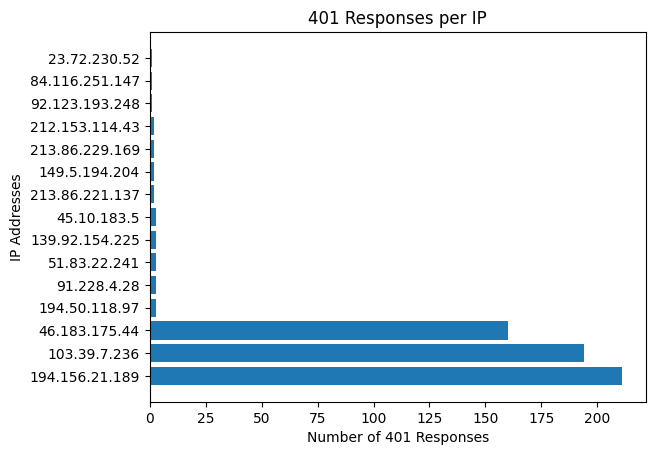

In [13]:
import matplotlib.pyplot as plt
df_401 = temp_df[temp_df['sc-status'] == 401]
ip_counts = df_401['c-ip'].value_counts()
print('401 responses per IP\n',ip_counts)
plt.barh(ip_counts.index, ip_counts.values)
plt.title('401 Responses per IP')
plt.xlabel('Number of 401 Responses')
plt.ylabel('IP Addresses')
plt.show()


We can see here that we have 3 IP addresses with high number of 401 responses, 194.156.21.189, 103.39.7.236, and 46.183.175.44. We need to investigate these 3 IPs indivudualy. We start with: 194.156.21.189: We identify which page was targeted while it was
receving 401 code. We identify what is the time range between the first and last attempt.

In [14]:
ip_address = '194.156.21.189'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address) &
 (temp_df['sc-status'] == 401)]
times = df_filtered['time']
most_requested_page = df_filtered['cs(Referer)'].value_counts().idxmax()
print(f"Most requested page is: {most_requested_page}")
print(times)


Most requested page is: https://uwecybersolutions.co.uk/login.aspx
338   2024-01-15 11:11:06
339   2024-01-15 11:11:07
340   2024-01-15 11:11:08
341   2024-01-15 11:11:11
342   2024-01-15 11:11:12
              ...        
575   2024-01-15 11:18:08
576   2024-01-15 11:18:10
577   2024-01-15 11:18:11
578   2024-01-15 11:18:13
579   2024-01-15 11:18:14
Name: time, Length: 211, dtype: datetime64[ns]


We can see that the target page was login.aspx, and from 11:11:06 to 11:18:14 this IP has a request to access this page every (1-2) seconds. That is an indicator of a brute force attack.

In [15]:
ip_address = '194.156.21.189'
most_requested_page = 'https://uwecybersolutions.co.uk/login.aspx'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['cs(Referer)'] == most_requested_page)
 & (temp_df['sc-status'] == 200)]
print(f" '{most_requested_page}'returned a 200 status code for'{ip_address}' on:")
print(df_filtered['time'])

 'https://uwecybersolutions.co.uk/login.aspx'returned a 200 status code for'194.156.21.189' on:
581   2024-01-15 11:18:18
582   2024-01-15 11:18:18
Name: time, dtype: datetime64[ns]


The last 401 status code was at 11:18:14 and at 11:18:18 194.156.21.189 recieved a 200 status code, which means the brute force attack was successful, and the attacker managed to find the credentilas.


In [16]:
ip_address = '194.156.21.189'
time_cutoff = '11:18:18'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['time'] > time_cutoff)]
code_counts = df_filtered.groupby(['cs(Referer)', 'sc-status']).size()
print(f"Pages were accessed by IP address '{ip_address}' after {time_cutoff}:")
print(code_counts)


Pages were accessed by IP address '194.156.21.189' after 11:18:18:
cs(Referer)                                             sc-status
https://uwecybersolutions.co.uk/transactions.aspx       200          16
                                                        404           1
https://uwecybersolutions.co.uk/transfer.aspx           200          30
                                                        404           5
https://uwecybersolutions.co.uk/transfer_complete.aspx  200          16
                                                        301           1
                                                        404           3
dtype: int64


We wanted to investigate what were the attacker activities after gaining access (after
11:18:18). We wanted to see what pages were visited by the attacker and what was the
status code, and how many count per status code. We can see the attacker managed to
make 16 successeful transfert, as the status code for the page
'https://uwecybersolutions.co.uk/transfer_complete.aspx' was 200(OK)
Now, we investigate 103.39.7.236 and we repeate the same process

In [17]:
ip_address = '103.39.7.236'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['sc-status'] == 401)]
dates = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')
times = df_filtered['time']
most_requested_page = df_filtered['cs(Referer)'].value_counts().idxmax()
print(f"Most requested page is: {most_requested_page}")
print(times)

Most requested page is: https://uwecybersolutions.co.uk/login.aspx
1042   2024-01-15 11:54:28
1043   2024-01-15 11:54:31
1044   2024-01-15 11:54:33
1045   2024-01-15 11:54:35
1046   2024-01-15 11:54:37
               ...        
1261   2024-01-15 12:00:53
1262   2024-01-15 12:00:55
1263   2024-01-15 12:00:56
1264   2024-01-15 12:00:57
1265   2024-01-15 12:00:58
Name: time, Length: 194, dtype: datetime64[ns]


103.39.7.236 was targeting the login page as well (login.aspx). However, in different time
range. From 11:54:28 to 12:00:58 tried to login every 1 or 2 seconds. We can conclude that
this IP was launchign a brute force against the login page. Now, if we investigate
46.183.175.44 with the same investigation process:


In [18]:
ip_address = '103.39.7.236'
most_requested_page = 'https://uwecybersolutions.co.uk/login.aspx'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['cs(Referer)'] == most_requested_page)
 & (temp_df['sc-status'] == 200)]
print(f"{most_requested_page}' returned a 200 status code for'{ip_address}' on:")
print(df_filtered['time'])

https://uwecybersolutions.co.uk/login.aspx' returned a 200 status code for'103.39.7.236' on:
1267   2024-01-15 12:01:02
1270   2024-01-15 12:01:02
Name: time, dtype: datetime64[ns]


The last 401 status code was at 12:00:58 and at 12:01:02 103.39.7.236 recieved a 200 status
code, which means the brute force attack was successful, and the attacker managed to find
the credentilas.


In [19]:
ip_address = '103.39.7.236'
time_cutoff = '12:01:02'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address) & (temp_df['time'] > time_cutoff)]
code_counts = df_filtered.groupby(['cs(Referer)', 'sc-status']).size()
print(f"Pages were accessed by'{ip_address}' after {time_cutoff}:")
print(code_counts)


Pages were accessed by'103.39.7.236' after 12:01:02:
cs(Referer)                                             sc-status
https://uwecybersolutions.co.uk/transactions.aspx       200           1
                                                        404           1
https://uwecybersolutions.co.uk/transfer.aspx           200          34
                                                        404           6
https://uwecybersolutions.co.uk/transfer_complete.aspx  200          18
                                                        301           1
dtype: int64


Pages were accessed by'103.39.7.236' after 12:01:02:
cs(Referer) sc-status
https://uwecybersolutions.co.uk/transactions.aspx 200 1
 404 1
https://uwecybersolutions.co.uk/transfer.aspx 200 34
404 6
https://uwecybersolutions.co.uk/transfer_complete.aspx 200 18
301 1
dtype: int64
Recording to the outup, from this IP; the attacker managed to make 18 successeful transfer.
As he recieved 18 (200-OK) for the page transfert_complete.aspx.

In [20]:
ip_address = '46.183.175.44'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['sc-status'] == 401)]
dates = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')
times = df_filtered['time']
most_requested_page = df_filtered['cs(Referer)'].value_counts().idxmax()
print(f"Most requested page is: {most_requested_page}")
print(times)

Most requested page is: https://uwecybersolutions.co.uk/login.aspx
1336   2024-01-15 23:01:22
1337   2024-01-15 23:01:24
1338   2024-01-15 23:01:27
1343   2024-01-15 23:01:30
1344   2024-01-15 23:01:32
               ...        
1519   2024-01-15 23:06:24
1520   2024-01-15 23:06:25
1521   2024-01-15 23:06:26
1522   2024-01-15 23:06:27
1523   2024-01-15 23:06:30
Name: time, Length: 160, dtype: datetime64[ns]


46.183.175.44 was requesting login.aspx page every 1 or 2 seconds in the periode from
23:01:22 to 23:06:30. We can say this IP tried to brute force the login page for this web
server.

In [21]:
ip_address = '46.183.175.44'
most_requested_page = 'https://uwecybersolutions.co.uk/login.aspx'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['cs(Referer)'] == most_requested_page)
 & (temp_df['sc-status'] == 200)]
print(f"{most_requested_page}' returned a 200 status code for'{ip_address}' on:")
print(df_filtered['time'])


https://uwecybersolutions.co.uk/login.aspx' returned a 200 status code for'46.183.175.44' on:
1525   2024-01-15 23:06:35
1526   2024-01-15 23:06:35
1527   2024-01-15 23:06:35
Name: time, dtype: datetime64[ns]


The last 401 status code was at 23:06:30 and at 23:06:35 46.183.175.44 recieved a 200 status
code, which means the brute force attack was successful, and the attacker managed to find
the credentilas.


In [22]:
ip_address = '46.183.175.44'
time_cutoff = '23:06:35'
df_filtered = temp_df[(temp_df['c-ip'] == ip_address)
 & (temp_df['time'] > time_cutoff)]
code_counts = df_filtered.groupby(['cs(Referer)', 'sc-status']).size()
print(f"Pages were accessed by IP address '{ip_address}' after {time_cutoff}:")
print(code_counts)

Pages were accessed by IP address '46.183.175.44' after 23:06:35:
cs(Referer)                                             sc-status
https://uwecybersolutions.co.uk/transactions.aspx       200           4
                                                        404           1
https://uwecybersolutions.co.uk/transfer.aspx           200          35
                                                        404           2
https://uwecybersolutions.co.uk/transfer_complete.aspx  200          14
                                                        301           1
dtype: int64


From this IP, 14 successful transfer occured.
Conclusion of the investigation: The attacker used 3 IP addresses to launch his attack. All the
attacks were the same but from different IPs and diffenert times. The attack process was as
follows: -The attacker launch a brute force against the login page. -After obtaining the
credentials, the attacker access the transfer.aspx page and start make some transacrions. -
The attacker made 48 transaction from three different accounts.